In [59]:
!python --version
!python -m pip install --upgrade pip
!python -m pip install "facetorch>=0.5.0" "torch==1.13.1+cu117" "torchvision==0.14.1+cu117" "torchaudio==0.13.1" --extra-index-url https://download.pytorch.org/whl/cu117

!pip list | grep facetorch

Python 3.10.10
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
facetorch                       0.5.0
time: 3.74 s (started: 2024-03-04 01:49:11 -05:00)


In [60]:
%pip install ipython-autotime
%load_ext autotime

Note: you may need to restart the kernel to use updated packages.
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.3 s (started: 2024-03-04 01:49:14 -05:00)


In [61]:
!wget -O ./test.jpg https://github.com/tomas-gajarsky/facetorch/blob/main/data/input/test.jpg?raw=true


--2024-03-04 01:49:16--  https://github.com/tomas-gajarsky/facetorch/blob/main/data/input/test.jpg?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tomas-gajarsky/facetorch/raw/main/data/input/test.jpg [following]
--2024-03-04 01:49:17--  https://github.com/tomas-gajarsky/facetorch/raw/main/data/input/test.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tomas-gajarsky/facetorch/main/data/input/test.jpg [following]
--2024-03-04 01:49:17--  https://raw.githubusercontent.com/tomas-gajarsky/facetorch/main/data/input/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... con

In [62]:
from facetorch import FaceAnalyzer
from omegaconf import OmegaConf
from torch.nn.functional import cosine_similarity
from typing import Dict
import operator
import torchvision

time: 468 µs (started: 2024-03-04 01:49:17 -05:00)


In [128]:

path_config="gpu.config.yml"


cfg = OmegaConf.load(path_config)

time: 58.3 ms (started: 2024-03-04 02:23:07 -05:00)


In [129]:
# initialize
analyzer = FaceAnalyzer(cfg.analyzer)


{"asctime": "2024-03-04 02:23:07,393", "levelname": "INFO", "message": "Initializing FaceAnalyzer"}
{"asctime": "2024-03-04 02:23:07,394", "levelname": "INFO", "message": "Initializing BaseReader"}
{"asctime": "2024-03-04 02:23:07,403", "levelname": "INFO", "message": "Initializing FaceDetector"}
{"asctime": "2024-03-04 02:23:07,565", "levelname": "INFO", "message": "Initializing FaceUnifier"}
{"asctime": "2024-03-04 02:23:07,574", "levelname": "INFO", "message": "Initializing FacePredictor objects"}
{"asctime": "2024-03-04 02:23:07,575", "levelname": "INFO", "message": "Initializing FacePredictor embed"}
{"asctime": "2024-03-04 02:23:07,713", "levelname": "INFO", "message": "Initializing FacePredictor verify"}
{"asctime": "2024-03-04 02:23:08,618", "levelname": "INFO", "message": "Initializing FacePredictor fer"}
{"asctime": "2024-03-04 02:23:08,795", "levelname": "INFO", "message": "Initializing FacePredictor au"}
{"asctime": "2024-03-04 02:23:09,225", "levelname": "INFO", "message":

time: 2.9 s (started: 2024-03-04 02:23:07 -05:00)


In [152]:
path_img_input="/media/qihan/CORSAIR/Test/Data/User_2/video_2/demo/2.png"
path_img_output="./test_output.jpg"

time: 259 µs (started: 2024-03-04 06:10:17 -05:00)


In [153]:
response=None
# warmup
response = analyzer.run(
        path_image=path_img_input,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=False,
        include_tensors=True,
        path_output=path_img_output,
    )

{"asctime": "2024-03-04 06:10:17,759", "levelname": "INFO", "message": "Running FaceAnalyzer"}
{"asctime": "2024-03-04 06:10:17,760", "levelname": "INFO", "message": "Reading image", "input": "/media/qihan/CORSAIR/Test/Data/User_2/video_2/demo/2.png"}
{"asctime": "2024-03-04 06:10:17,790", "levelname": "INFO", "message": "Detecting faces"}
{"asctime": "2024-03-04 06:10:17,880", "levelname": "INFO", "message": "Number of faces: 1"}
{"asctime": "2024-03-04 06:10:17,881", "levelname": "INFO", "message": "Unifying faces"}
{"asctime": "2024-03-04 06:10:17,881", "levelname": "INFO", "message": "Predicting facial features"}
{"asctime": "2024-03-04 06:10:17,882", "levelname": "INFO", "message": "Running FacePredictor: embed"}
{"asctime": "2024-03-04 06:10:17,889", "levelname": "INFO", "message": "Running FacePredictor: verify"}
{"asctime": "2024-03-04 06:10:17,901", "levelname": "INFO", "message": "Running FacePredictor: fer"}
{"asctime": "2024-03-04 06:10:17,911", "levelname": "INFO", "messag

time: 245 ms (started: 2024-03-04 06:10:17 -05:00)


In [154]:
response = analyzer.run(
        path_image=path_img_input,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=cfg.return_img_data,
        include_tensors=cfg.include_tensors,
        path_output=path_img_output,
    )

{"asctime": "2024-03-04 06:10:18,002", "levelname": "INFO", "message": "Running FaceAnalyzer"}
{"asctime": "2024-03-04 06:10:18,002", "levelname": "INFO", "message": "Reading image", "input": "/media/qihan/CORSAIR/Test/Data/User_2/video_2/demo/2.png"}
{"asctime": "2024-03-04 06:10:18,025", "levelname": "INFO", "message": "Detecting faces"}
{"asctime": "2024-03-04 06:10:18,256", "levelname": "INFO", "message": "Number of faces: 1"}
{"asctime": "2024-03-04 06:10:18,257", "levelname": "INFO", "message": "Unifying faces"}
{"asctime": "2024-03-04 06:10:18,258", "levelname": "INFO", "message": "Predicting facial features"}
{"asctime": "2024-03-04 06:10:18,259", "levelname": "INFO", "message": "Running FacePredictor: embed"}
{"asctime": "2024-03-04 06:10:18,267", "levelname": "INFO", "message": "Running FacePredictor: verify"}
{"asctime": "2024-03-04 06:10:18,281", "levelname": "INFO", "message": "Running FacePredictor: fer"}
{"asctime": "2024-03-04 06:10:18,293", "levelname": "INFO", "messag

time: 375 ms (started: 2024-03-04 06:10:17 -05:00)


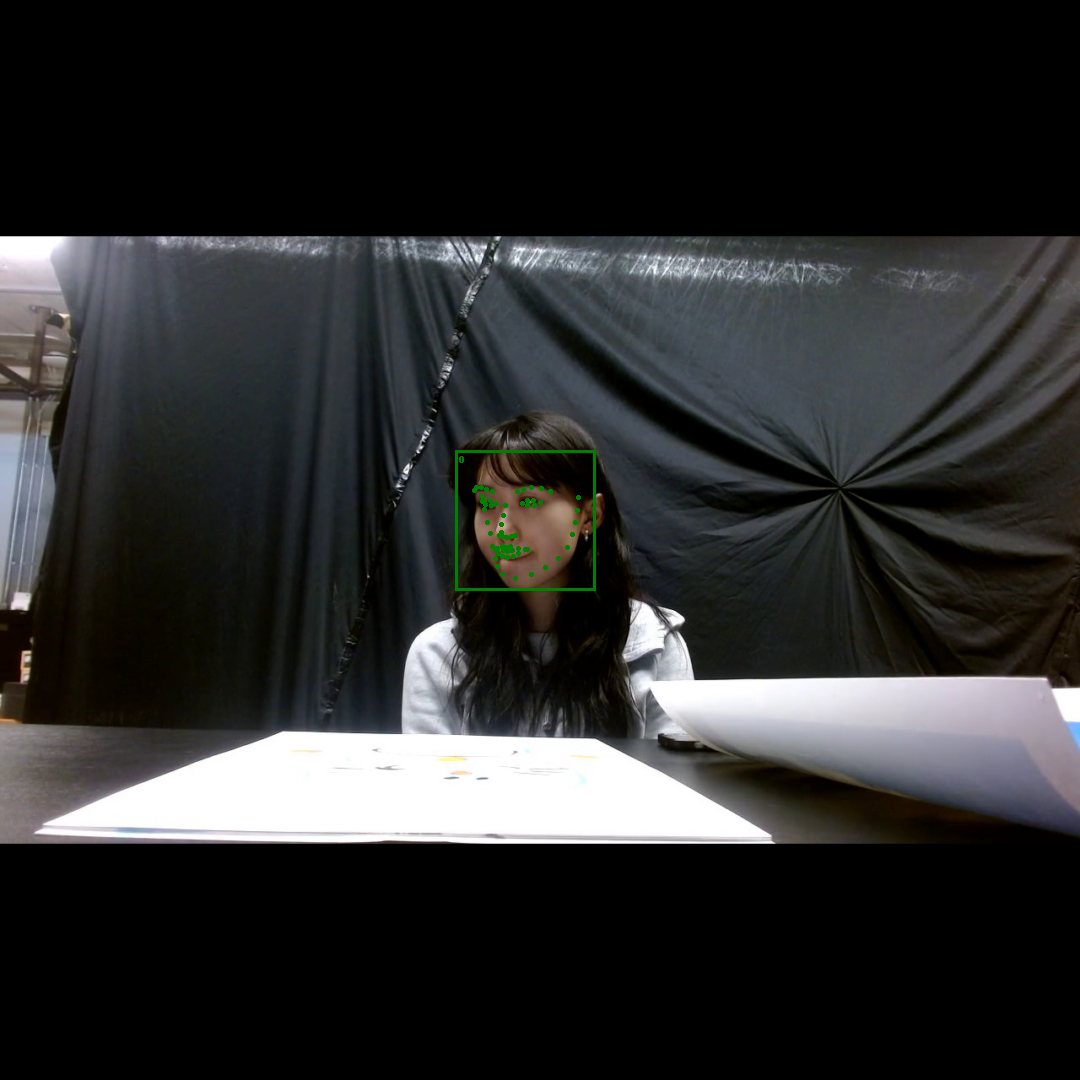

time: 71.4 ms (started: 2024-03-04 06:10:18 -05:00)


In [155]:
pil_image = torchvision.transforms.functional.to_pil_image(response.img)
pil_image

In [156]:
{face.indx: face.preds["fer"].label for face in response.faces}


{0: 'Contempt'}

time: 3.06 ms (started: 2024-03-04 06:10:18 -05:00)


In [157]:
{face.indx: face.preds["au"].other["multi"] for face in response.faces}



{0: []}

time: 2.09 ms (started: 2024-03-04 06:10:18 -05:00)


In [158]:
{face.indx: face.preds["va"].other for face in response.faces}


{0: {'valence': 0.5040503740310669, 'arousal': -0.077409528195858}}

time: 2.43 ms (started: 2024-03-04 06:10:18 -05:00)


In [179]:
import os
error_cluster_path_img_inputs=["/media/qihan/CORSAIR/Test/Data/User_2/video_2/demo/error_baseline_0.png","/media/qihan/CORSAIR/Test/Data/User_2/video_2/demo/error_baseline_1.png","/media/qihan/CORSAIR/Test/Data/User_2/video_2/demo/error_baseline_2.png","/media/qihan/CORSAIR/Test/Data/User_2/video_2/demo/error_baseline_3.png"]
path_img_output="./test_output.jpg"

neutral_cluster_path_img_inputs=["/media/qihan/CORSAIR/Test/Data/User_2/video_2/demo/neutral_baseline_0.png","/media/qihan/CORSAIR/Test/Data/User_2/video_2/demo/neutral_baseline_1.png","/media/qihan/CORSAIR/Test/Data/User_2/video_2/demo/neutral_baseline_2.png"]
#responses = [(index, analyzer.run( path_image=path_img_input, batch_size=cfg.batch_size, fix_img_size=cfg.fix_img_size, return_img_data=False, include_tensors=True, path_output=path_img_output, )) for index, path_img_input in enumerate(path_img_inputs)]

error_responses = [(index, analyzer.run( path_image=error_cluster_path_img_input, batch_size=cfg.batch_size, fix_img_size=cfg.fix_img_size, return_img_data=cfg.return_img_data, include_tensors=cfg.include_tensors, path_output=path_img_output, )) for index, error_cluster_path_img_input in enumerate(error_cluster_path_img_inputs)] 
neutral_responses = [(index, analyzer.run( path_image=neutral_cluster_path_img_input, batch_size=cfg.batch_size, fix_img_size=cfg.fix_img_size, return_img_data=cfg.return_img_data, include_tensors=cfg.include_tensors, path_output=path_img_output, )) for index, neutral_cluster_path_img_input in enumerate(neutral_cluster_path_img_inputs)]

'''
for response in responses:
    pil_image = torchvision.transforms.functional.to_pil_image(response[1].img)
    output_dir = "./output_images"
    os.makedirs(output_dir, exist_ok=True)

    for response in responses:
        index = response[0]
        pil_image = torchvision.transforms.functional.to_pil_image(response[1].img)
        output_path = os.path.join(output_dir, f"image_{index}.jpg")
        pil_image.save(output_path)
'''


{"asctime": "2024-03-04 08:05:33,159", "levelname": "INFO", "message": "Running FaceAnalyzer"}
{"asctime": "2024-03-04 08:05:33,160", "levelname": "INFO", "message": "Reading image", "input": "/media/qihan/CORSAIR/Test/Data/User_2/video_2/demo/error_baseline_0.png"}
{"asctime": "2024-03-04 08:05:33,280", "levelname": "INFO", "message": "Detecting faces"}
{"asctime": "2024-03-04 08:05:33,426", "levelname": "INFO", "message": "Number of faces: 1"}
{"asctime": "2024-03-04 08:05:33,427", "levelname": "INFO", "message": "Unifying faces"}
{"asctime": "2024-03-04 08:05:33,429", "levelname": "INFO", "message": "Predicting facial features"}
{"asctime": "2024-03-04 08:05:33,430", "levelname": "INFO", "message": "Running FacePredictor: embed"}
{"asctime": "2024-03-04 08:05:33,443", "levelname": "INFO", "message": "Running FacePredictor: verify"}
{"asctime": "2024-03-04 08:05:33,456", "levelname": "INFO", "message": "Running FacePredictor: fer"}
{"asctime": "2024-03-04 08:05:33,472", "levelname": 

'\nfor response in responses:\n    pil_image = torchvision.transforms.functional.to_pil_image(response[1].img)\n    output_dir = "./output_images"\n    os.makedirs(output_dir, exist_ok=True)\n\n    for response in responses:\n        index = response[0]\n        pil_image = torchvision.transforms.functional.to_pil_image(response[1].img)\n        output_path = os.path.join(output_dir, f"image_{index}.jpg")\n        pil_image.save(output_path)\n'

time: 2.06 s (started: 2024-03-04 08:05:33 -05:00)


In [181]:
new_img_path="/media/qihan/CORSAIR/Test/Data/User_2/video_2/demo/3.png"
new_img=analyzer.run( path_image=new_img_path, batch_size=cfg.batch_size, fix_img_size=cfg.fix_img_size, return_img_data=cfg.return_img_data, include_tensors=cfg.include_tensors, path_output=path_img_output)

{"asctime": "2024-03-04 08:06:25,511", "levelname": "INFO", "message": "Running FaceAnalyzer"}
{"asctime": "2024-03-04 08:06:25,512", "levelname": "INFO", "message": "Reading image", "input": "/media/qihan/CORSAIR/Test/Data/User_2/video_2/demo/3.png"}
{"asctime": "2024-03-04 08:06:25,559", "levelname": "INFO", "message": "Detecting faces"}
{"asctime": "2024-03-04 08:06:25,650", "levelname": "INFO", "message": "Number of faces: 1"}
{"asctime": "2024-03-04 08:06:25,650", "levelname": "INFO", "message": "Unifying faces"}
{"asctime": "2024-03-04 08:06:25,651", "levelname": "INFO", "message": "Predicting facial features"}
{"asctime": "2024-03-04 08:06:25,651", "levelname": "INFO", "message": "Running FacePredictor: embed"}
{"asctime": "2024-03-04 08:06:25,657", "levelname": "INFO", "message": "Running FacePredictor: verify"}
{"asctime": "2024-03-04 08:06:25,668", "levelname": "INFO", "message": "Running FacePredictor: fer"}
{"asctime": "2024-03-04 08:06:25,681", "levelname": "INFO", "messag

time: 250 ms (started: 2024-03-04 08:06:25 -05:00)


In [183]:
import operator
from torch.nn.functional import cosine_similarity
import numpy as np
base_emb = new_img.faces[0].preds["verify"].logits
print("error: ",np.mean([cosine_similarity(base_emb, response[1].faces[0].preds["verify"].logits, dim=0).item() for response in neutral_responses]))
print("neutral: ",np.mean([cosine_similarity(base_emb, response[1].faces[0].preds["verify"].logits, dim=0).item() for response in error_responses]))
#sim_dict = {response[0]: cosine_similarity(base_emb, response[1].faces[0].preds["verify"].logits, dim=0).item() for response in error_responses}
#sim_dict_sorted = dict(sorted(sim_dict.items(), key=operator.itemgetter(1),reverse=True))
#print(sim_dict_sorted)

[0.5540186762809753, 0.42267683148384094, 0.43380650877952576]
time: 1.28 ms (started: 2024-03-04 08:08:15 -05:00)
